# AD 654 Final project

Group MSSP

Yingnan Lyu, Qihan Su, Yaquan Yang, Haocheng Zhu

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Data Visualization

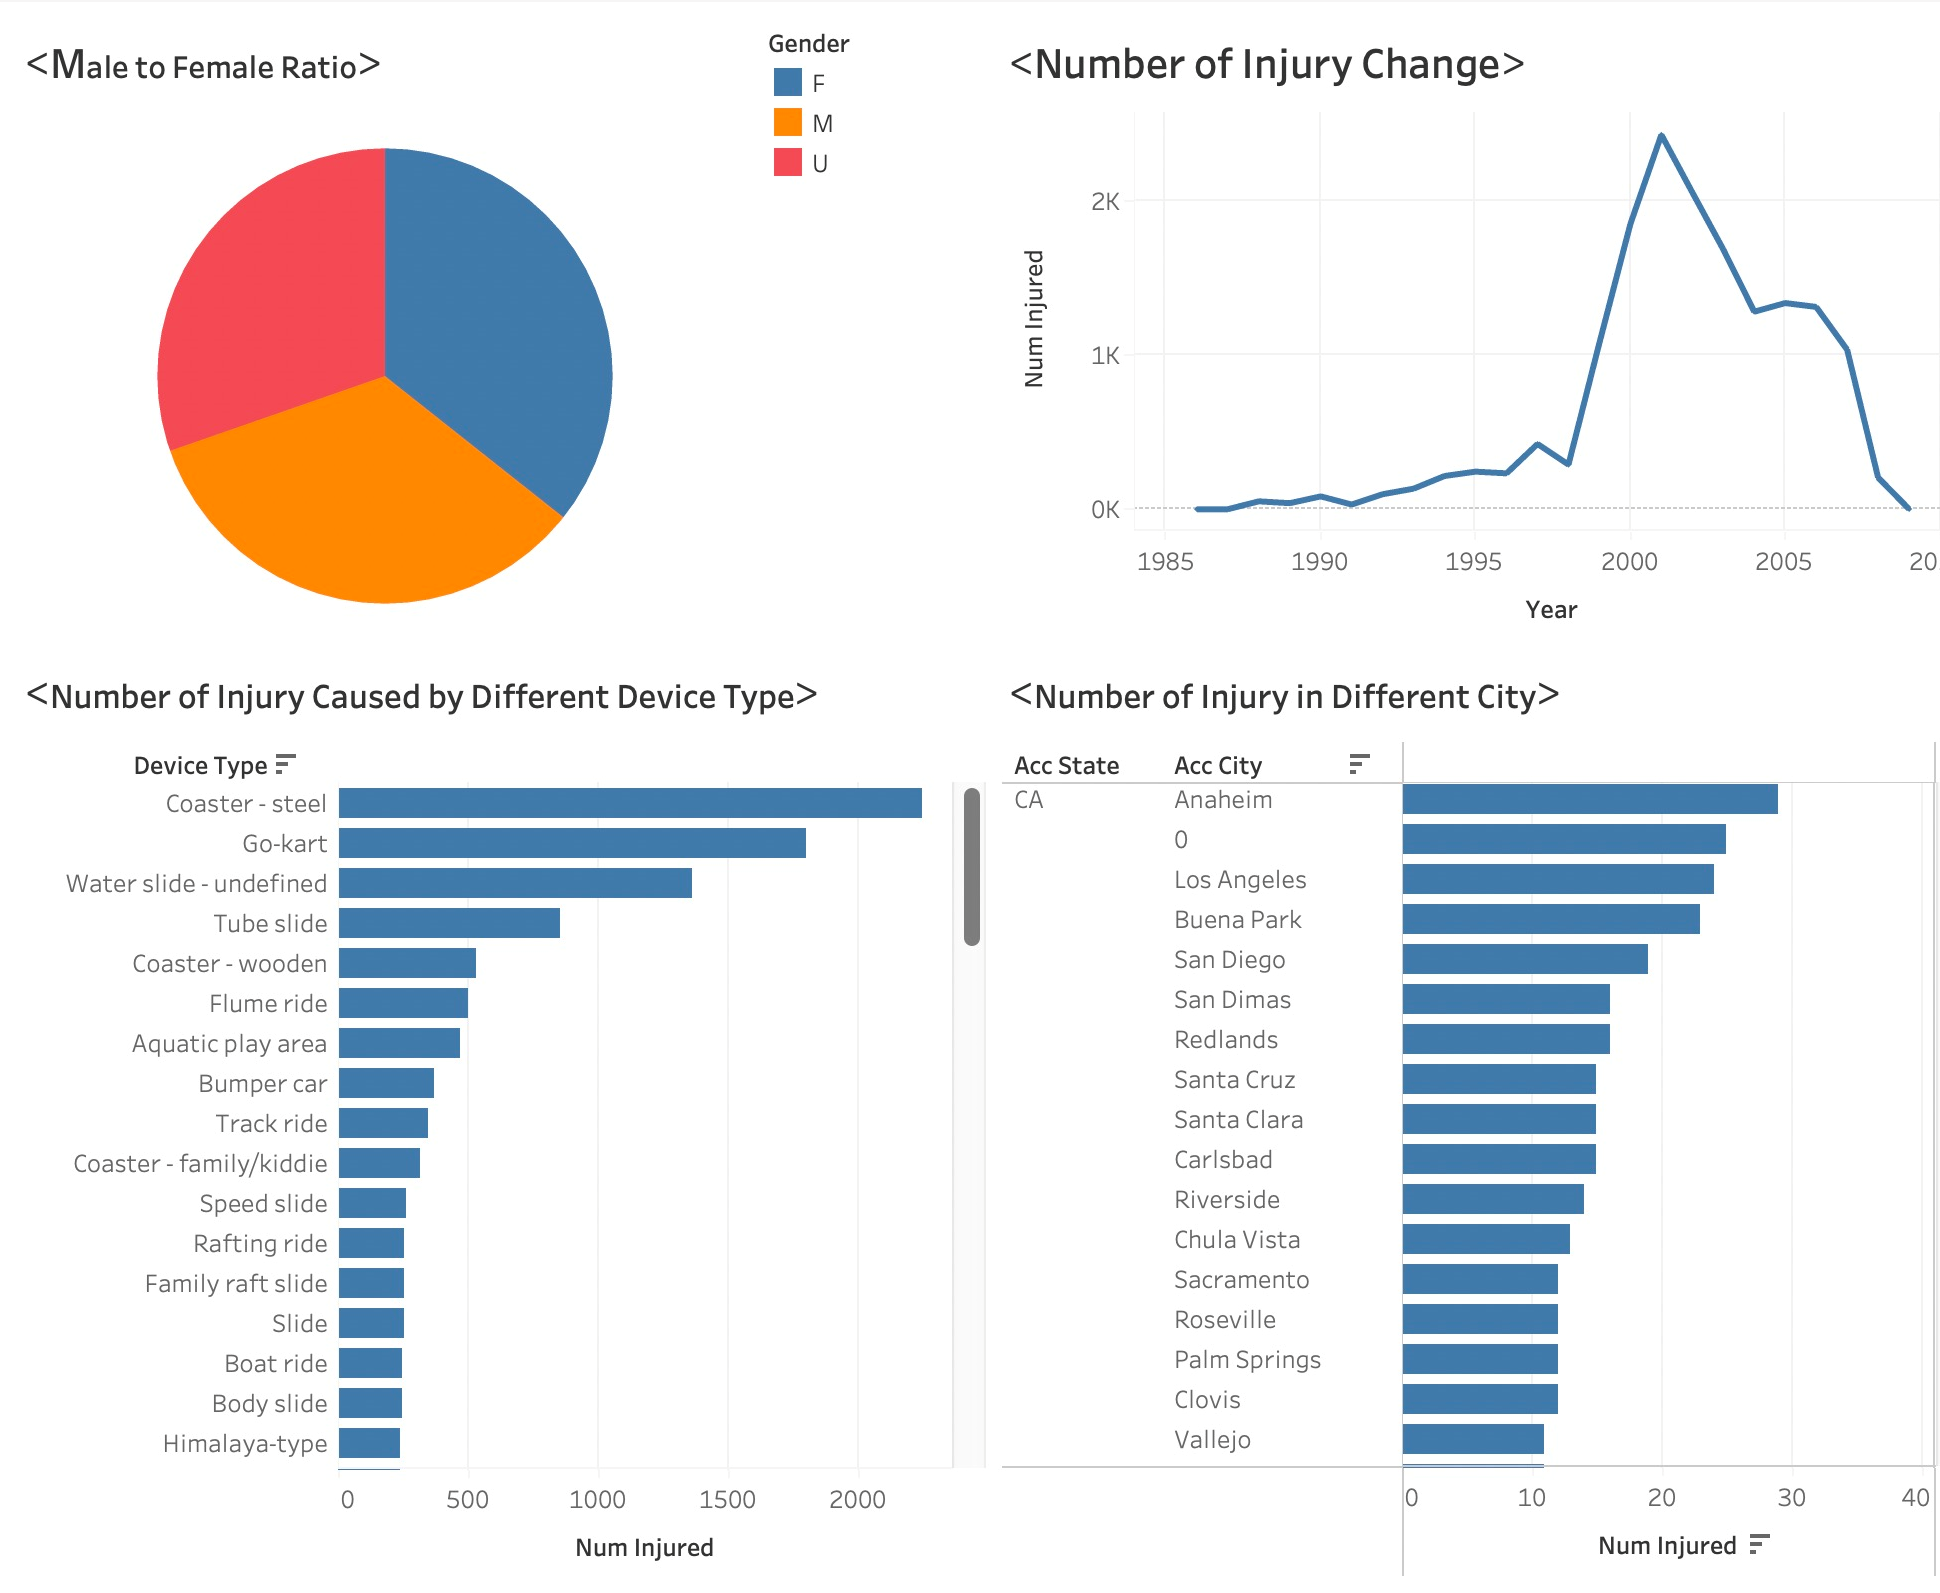

# Summary Stats

In [2]:
df = pd.read_csv('park_accidents.csv')
promo_pics = pd.read_csv('promo_pics.csv')
#print(df.head())

df.groupby('category').agg({'acc_date': 'count','num_injured': 'sum','age_youngest': 'mean'})

,acc_date,num_injured,age_youngest
category,,,
Abrupt stop/drop/lurch,108,232,22.537037
Awkward landing,1,1,0.000000
Body pain (normal motion),1422,1438,22.277075
Burn (includes friction burn),88,90,12.693182
"Choking, water inhalation, suffocation",28,29,8.821429
Collision: go-kart crashed (no further description),14,14,12.142857
Collision: go-kart or bumper car hit stationary object,434,441,11.783410
Collision: operator-controlled vehicles,142,374,17.176056
Collision: patron-controlled vehicles,1273,1296,15.545954


The most common category of incidents is "Collision: patron-controlled vehicles", with 1,273 reported incidents.The category with the highest number of injuries is "Collision: patron-controlled vehicles", with a total of 1,296 reported injuries.The category with the highest average age of the youngest person involved is "Illness or neurological symptoms", with an average age of 38.38 years.The category with the highest average number of incidents per day is "Collision: patron-controlled vehicles", with an average of 3.53 incidents per day.

It's important to keep in mind that these results are based on the data that was collected and reported, and may not be representative of all incidents that occurred at the amusement park. Additionally, further analysis and investigation may be necessary to fully understand the causes and factors contributing to these incidents.

In [3]:
df.groupby('year').agg({'acc_date': 'count','num_injured': 'sum','age_youngest': 'mean', })

,acc_date,num_injured,age_youngest
year,,,
1986,1,1,30.000000
1987,1,1,15.000000
1988,31,52,0.000000
1989,40,40,0.000000
1990,84,84,3.833333
1991,31,31,8.161290
1992,92,98,10.423913
1993,134,134,11.514925
1994,194,216,18.551546


This code groups the data by year and calculates several statistics for each group.From this summary, we can see that the number of accidents and injuries varies greatly from year to year. The highest numbers of accidents and injuries occurred in the years 2000, 2001, and 2002.

We can also see that the average age of the youngest person involved in each accident was relatively high in some years, particularly in 2003 when it was 110 years old. However, this could be due to some outliers or errors in the data, so it should be further investigated.

In [4]:
df.groupby('gender').agg({'acc_date': 'count','num_injured': 'sum','age_youngest': 'mean' })

,acc_date,num_injured,age_youngest
gender,,,
F,7041,7274,20.244852
M,5261,5418,17.382057
U,2582,3402,6.560031


Based on the provided code and result, it appears that the data has been grouped by the gender column. The summary statistics are then calculated for the number of accidents, number of injured individuals, and the mean age of the youngest individual involved in each group.

In terms of the number of injured individuals, the dataset has more injured individuals in the female group with a total of 7,274, followed by the male group with 5,418, and the unspecified gender group with 3,402. Looking at the mean age of the youngest individual involved in each group, it appears that the unspecified gender group has the youngest with a mean age of 6.56 years. The male group has a mean age of 17.38 years, and the female group has a mean age of 20.24 years.

It is important to note that the analysis only takes into account the variables provided in the code, and other variables may also play a role in determining the characteristics of each group.

In [5]:
df.groupby('mechanical').agg({'acc_date': 'count','num_injured': 'sum','age_youngest': 'mean'})

,acc_date,num_injured,age_youngest
mechanical,,,
False,13949,14399,17.361173
True,935,1695,9.366845


This code groups the data in the dataframe by the values in the mechanical column and calculates the count of accident dates, the sum of injured people, and the mean of the youngest age for each group.

The result shows that the data is divided into two groups based on the mechanical column - False and True. The group with mechanical=False has a higher count of accident dates, a higher sum of injured people, and a higher mean age of the youngest person involved in the accidents.

Therefore, we can conclude that accidents that involve mechanical factors have a lower frequency but tend to have younger people involved and less severe injuries.

In [6]:
df.groupby('op_error').agg({'acc_date': 'count','num_injured': 'sum','age_youngest': 'mean' })

,acc_date,num_injured,age_youngest
op_error,,,
False,14625,15702,16.923624
True,259,392,13.208494


The results show that there were 14625 accidents with no operational error and 259 accidents with operational errors. The total number of injuries was higher in accidents with no operational errors (15702) compared to accidents with operational errors (392). The mean age of the youngest person involved in the accident was 16.9 years for accidents with no operational errors and 13.2 years for accidents with operational errors.

Overall, it appears that operational errors may lead to fewer injuries on average but may involve younger individuals on average compared to accidents with no operational errors. However, it is important to note that the total number of accidents with no operational errors is much higher compared to accidents with operational errors in this dataset, so further analysis may be necessary to draw more conclusive insights.

In [7]:
df.groupby('device_category').agg({'acc_date': 'count','num_injured': 'sum','age_youngest': 'mean' })

,acc_date,num_injured,age_youngest
device_category,,,
alpine activity,41,45,16.634146
aquatic play,465,467,11.049462
cars & track rides,1025,1062,19.334634
challenge activity,96,96,20.031250
coaster,2748,3111,19.511645
float attraction,187,187,16.042781
go-kart,1767,1798,13.900962
inflatable,151,264,8.185430
laser tag,1,1,0.000000


This is a summary of injury data grouped by the device category.

The device categories with the highest number of accidents are "water slide" and "coaster". The device categories with the highest number of injuries are "coaster" and "spinning". The device categories with the highest average age of the youngest person injured are "coaster" and "water ride". It is interesting to note that the `laser tag` category only had one accident recorded in the dataset.

# Segmentation and Targeting

In [158]:
df = pd.read_csv('ski_hotels.csv')

In [159]:
object_cols = df.select_dtypes(include=['float64'])
print(object_cols.columns)

Index(['blues', 'reds', 'blacks', 'totalRuns'], dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


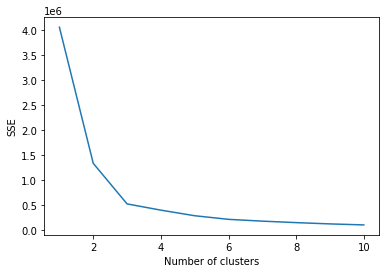

In [172]:
# Select the features to use for clustering
X = df[['blues', 'reds', 'blacks', 'totalRuns']]
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [173]:


# Choose the number of clusters
k =3

# Create the KMeans model
kmeans = KMeans(n_clusters=k)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original dataset
df['cluster'] = labels


In [174]:
clusters = kmeans.predict(X)
df['cluster'] = clusters


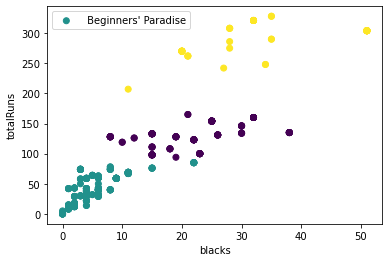

In [175]:
plt.scatter(df['blacks'],df['totalRuns'], c=df['cluster'])
plt.xlabel("blacks")
plt.ylabel("totalRuns")

plt.legend([" Beginners' Paradise", "Advanced Paradise", "Superior Paradise"])
plt.show()
          

*The yellow cluster names: Beginners' Paradise; The purple cluster names: Advanced Paradise; The blue cluster names: Superior Paradise. This beacuse that the yellow cluster usually have the small quantity of blacks and total runs which means that for people who ski here, there is no need for them to chase rides quantity espiecially the black ride which is the most difficult rides.*

*At first, according to the elbow plot I first choose 4 as k in k-means model, however, after I plot the scatterplot, the cluster is not that significant. So I choose 5 and 3 as comparison. It shows clearly that when k is 3, there are 3 clusters.*

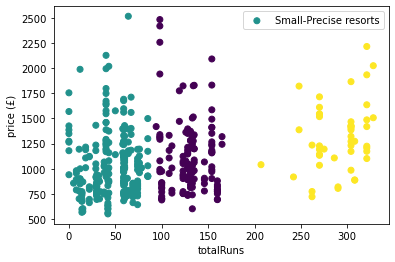

In [176]:
plt.scatter(df['totalRuns'],df['price (£)'], c=df['cluster'])
plt.xlabel("totalRuns")
plt.ylabel("price (£)")

plt.legend(['Small-Precise resorts', 'Medium-Progressive resorts', 'Large-Elite resorts'])

plt.show()

*From the plot above, we can know that the first cluster("Small-Precise resorts") has relatively few total runs, and the number of total runs is mainly concentrated between 0 and 100. However, many of resorts are here, most of them has a price between 600 to 1500 with few of them has higher pricea. while the number of total runs of the second cluster("Medium-Progressive resorts") is mainly between 100 and 200.Comparing to the "Small-Precise resorts", the "Medium-Progressive resorts" has more runs which perfect for advanced skiers who are also looking for resort quality.  And the third cluster(“Large-Elite resorts") has more total runs but the overall price is higher than the first two clusters. The “Large-Elite resorts" all have more than 250 trails and all have an overall price range of 750€ to 2250€. The reason for the overall high prices and lack of low prices is that there are not many ski resorts that fit this profile and only the most advanced ski enthusiasts choose these top resorts.*

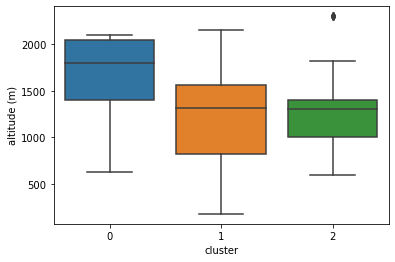

In [177]:
# plot a box plot for each variable within each cluster
sns.boxplot(x='cluster', y='altitude (m)', data=df)
plt.show()

*From the above figure, it can be seen that the first cluster has the highest overall elevation. The second cluster has the most concentrated altitude distribution among the resorts, mainly between 1000 and 1500. The third cluster has the most dispersed altitude distribution, ranging from 700 to 1600. For skiers, the higher the altitude, the lower the temperature, and the better the quality of snow. Therefore, for skiers, higher altitudes may be more attractive. However, higher altitude also means lower air pressure and thinner air, which may have some physical effects. This is because the thin air at higher altitudes can cause the body to take in less oxygen, which affects the body's endurance and reaction time. Therefore, for some high-level skiers, it may be more appropriate to choose a resort at a lower altitude.*

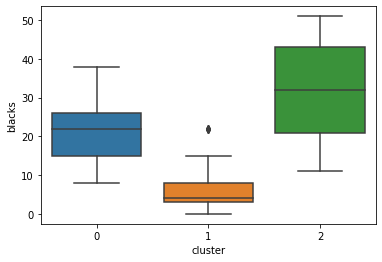

In [178]:
# plot a box plot for each variable within each cluster
sns.boxplot(x='cluster', y='blacks', data=df)
plt.show()

*From the box plot above, we can know that the cluster0("Medium-difficulty") has the number of black runs range from 15 to 25,while the cluster1("The Brave") has the most number of black runs. The cluster3("Beginners") has the smallest quantity of black runs which may be the easiest resotrs.*

Text(0.5, 1.0, 'Countrys among different cluster')

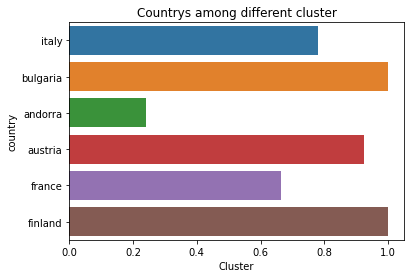

In [179]:
sns.barplot(x='cluster', y='country', data=df, ci=None);
plt.xlabel('Cluster')
plt.title("Countrys among different cluster")

*From the bar chart above, we can know that Bulgaria and Finland has the most resorts. The cluster are differed by country.*

# Conjoint Analysis & Memo Section

In [8]:
#import data
amenities=pd.read_csv("hotel_amenities.csv")
amenities.head()

,WiFi_Network,breakfast,parking,gym,flex_check,shuttle_bus,air_pure,jacuzzi,VIP_shop,pool_temp,avg_rating
0,Basic,None,Valet,None,No,No,No,No,No,76,4.57
1,Basic,None,Valet,None,No,No,No,No,No,80,7.60
2,Basic,None,Valet,None,No,No,No,No,No,84,5.66
3,Basic,None,Valet,None,No,No,No,No,Yes,76,2.80
4,Basic,None,Valet,None,No,No,No,No,Yes,80,4.56


In [54]:
amenities.columns

Index(['WiFi_Network', 'breakfast', 'parking', 'gym', 'flex_check',
       'shuttle_bus', 'air_pure', 'jacuzzi', 'VIP_shop', 'pool_temp',
       'avg_rating'],
      dtype='object')

In [55]:
amenities=pd.get_dummies(amenities, drop_first=True, columns=['WiFi_Network', 'breakfast', 'parking', 'gym', 'flex_check',
       'shuttle_bus', 'air_pure', 'jacuzzi', 'VIP_shop', 'pool_temp'])
amenities.head()

,avg_rating,WiFi_Network_Best in Class,WiFi_Network_Strong,breakfast_Full Buffet,breakfast_None,parking_Valet,gym_Basic,gym_None,gym_Super,flex_check_Yes,shuttle_bus_Yes,air_pure_Yes,jacuzzi_Yes,VIP_shop_Yes,pool_temp_80,pool_temp_84
0,4.57,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
1,7.60,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0
2,5.66,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
3,2.80,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
4,4.56,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0


In [57]:
X = amenities.drop('avg_rating', axis=1)

y = amenities['avg_rating']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=654)

X = X_train
y = y_train

In [58]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             avg_rating   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              3778.
Date:                Sat, 06 May 2023   Prob (F-statistic):                        0.00
Time:                        23:31:53   Log-Likelihood:                         -8678.2
No. Observations:                4147   AIC:                                  1.739e+04
Df Residuals:                    4132   BIC:                                  1.748e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
WiFi_Network_Best in Class     2.7674      0.071     38.867      0.000       2.628       2.907
WiFi_Network_Strong            2.1997      0.070     31.252      0.000       2.062       2.338
breakfast_Full Buffet          1.6164      0.071     22.811      0.000       1.478       1.755
breakfast_None                 0.8383      0.071     11.882      0.000       0.700       0.977
parking_Valet                  0.7440      0.059     12.556      0.000       0.628       0.860
gym_Basic                      1.2717      0.080     15.982      0.000       1.116       1.428
gym_None                       1.2056      0.081     14.796      0.000       1.046       1.365
gym_Super                      1.4480      0.081     17.908      0.000       1.289       1.606
flex_check_Yes                 1.1917      0.059     20.202      0.000       1.076       1.307
shuttle_bus_Yes                1.1522      0.059     19.497      0.000       1.036       1.268
air_pure_Yes                   0.7440      0.059     12.586      0.000       0.628       0.860
jacuzzi_Yes                    0.8552      0.059     14.455      0.000       0.739       0.971
VIP_shop_Yes                   0.9009      0.059     15.231      0.000       0.785       1.017
pool_temp_80                   1.1466      0.071     16.252      0.000       1.008       1.285
pool_temp_84                   1.2796      0.072     17.892      0.000       1.139       1.420
==============================================================================
Omnibus:                        6.514   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.558
Skew:                           0.091   Prob(JB):                       0.0377
Kurtosis:                       2.932   Cond. No.                         5.98
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*According to the results of the regression model, the features significantly associated with the "avg_rating" are ranked in descending order of importance: "WIFI", "breakfast", "gym","pool temperature","flex check","shuttle bus","VIP_shop", "jacuzzi","parking", *
*Considering the cost of hotel amenities should not be higher than 250 per night,our recommended hotel amenity decoration plan is：Equipped with WIFI Best in Class, Full Buffet Breakfast, Super gym, pool temperature 84, Flexible check,Shuttle Bus*

In [59]:
amenity_costs=pd.read_csv("amenity_costs.csv")
amenity_costs.head()

,Amenity,Level,"Estimated Incremental Cost,\nPer Visitor/Per Night"
0,WiFi_Network,Basic,11.75
1,WiFi_Network,Strong,16.25
2,WiFi_Network,Best in Class,19.15
3,breakfast,None,0.00
4,breakfast,Continental,13.25


# Forecasting Total Spending

In [49]:
hyatt = pd.read_csv('H_quarterly_financials.csv',thousands=',')
hyatt= hyatt.drop("ttm", axis=1)
hilton = pd.read_csv('HLT_quarterly_financials.csv',thousands=',')
hilton = hilton.drop('ttm', axis=1)

In [50]:
hilton_transposed = hilton.T
hilton_transposed.to_csv('transposed_hilton.csv', index=True, header=True)
hilton_data = pd.read_csv('transposed_hilton.csv',header=1)
hilton_data = hilton_data.rename(columns={'name': 'date'})
hilton_data.head()

,date,TotalRevenue,\tOperatingRevenue,CostOfRevenue,GrossProfit,OperatingExpense,\tSellingGeneralAndAdministration,\t\tGeneralAndAdministrativeExpense,\t\t\tOtherGandA,\tDepreciationAmortizationDepletionIncomeStatement,...,EBIT,EBITDA,ReconciledCostOfRevenue,ReconciledDepreciation,NetIncomeFromContinuingOperationNetMinorityInterest,TotalUnusualItemsExcludingGoodwill,TotalUnusualItems,NormalizedEBITDA,TaxRateForCalcs,TaxEffectOfUnusualItems
0,03/31/2023,2.293000e+09,9.010000e+08,1.646000e+09,647000000.0,149000000.0,91000000.0,91000000.0,91000000.0,37000000.0,...,418000000.0,NaN,1.646000e+09,37000000.0,206000000.0,NaN,NaN,455000000.0,0.308,0.000
1,12/31/2022,2.444000e+09,1.038000e+09,1.781000e+09,663000000.0,159000000.0,95000000.0,95000000.0,95000000.0,39000000.0,...,523000000.0,NaN,1.781000e+09,39000000.0,328000000.0,1000000.0,1000000.0,561000000.0,0.174,173697.270
2,09/30/2022,2.368000e+09,9.960000e+08,1.600000e+09,768000000.0,145000000.0,93000000.0,93000000.0,93000000.0,39000000.0,...,633000000.0,NaN,1.600000e+09,39000000.0,347000000.0,0.0,0.0,672000000.0,0.343,0.000
3,06/30/2022,2.240000e+09,9.480000e+08,1.488000e+09,752000000.0,154000000.0,103000000.0,103000000.0,103000000.0,40000000.0,...,612000000.0,NaN,1.488000e+09,40000000.0,368000000.0,8000000.0,8000000.0,644000000.0,0.285,2276803.119
4,03/31/2022,1.721000e+09,6.520000e+08,1.206000e+09,515000000.0,146000000.0,91000000.0,91000000.0,91000000.0,44000000.0,...,381000000.0,NaN,1.206000e+09,44000000.0,212000000.0,-4000000.0,-4000000.0,429000000.0,0.275,-1099656.357


In [51]:
hilton_data['date'] = pd.to_datetime(hilton_data['date'])
hilton_data.set_index('date', inplace=True)
hilton_data.head()

,TotalRevenue,\tOperatingRevenue,CostOfRevenue,GrossProfit,OperatingExpense,\tSellingGeneralAndAdministration,\t\tGeneralAndAdministrativeExpense,\t\t\tOtherGandA,\tDepreciationAmortizationDepletionIncomeStatement,\t\tDepreciationAndAmortizationInIncomeStatement,...,EBIT,EBITDA,ReconciledCostOfRevenue,ReconciledDepreciation,NetIncomeFromContinuingOperationNetMinorityInterest,TotalUnusualItemsExcludingGoodwill,TotalUnusualItems,NormalizedEBITDA,TaxRateForCalcs,TaxEffectOfUnusualItems
date,,,,,,,,,,,,,,,,,,,,,
2023-03-31,2.293000e+09,9.010000e+08,1.646000e+09,647000000.0,149000000.0,91000000.0,91000000.0,91000000.0,37000000.0,37000000.0,...,418000000.0,NaN,1.646000e+09,37000000.0,206000000.0,NaN,NaN,455000000.0,0.308,0.000
2022-12-31,2.444000e+09,1.038000e+09,1.781000e+09,663000000.0,159000000.0,95000000.0,95000000.0,95000000.0,39000000.0,39000000.0,...,523000000.0,NaN,1.781000e+09,39000000.0,328000000.0,1000000.0,1000000.0,561000000.0,0.174,173697.270
2022-09-30,2.368000e+09,9.960000e+08,1.600000e+09,768000000.0,145000000.0,93000000.0,93000000.0,93000000.0,39000000.0,39000000.0,...,633000000.0,NaN,1.600000e+09,39000000.0,347000000.0,0.0,0.0,672000000.0,0.343,0.000
2022-06-30,2.240000e+09,9.480000e+08,1.488000e+09,752000000.0,154000000.0,103000000.0,103000000.0,103000000.0,40000000.0,40000000.0,...,612000000.0,NaN,1.488000e+09,40000000.0,368000000.0,8000000.0,8000000.0,644000000.0,0.285,2276803.119
2022-03-31,1.721000e+09,6.520000e+08,1.206000e+09,515000000.0,146000000.0,91000000.0,91000000.0,91000000.0,44000000.0,44000000.0,...,381000000.0,NaN,1.206000e+09,44000000.0,212000000.0,-4000000.0,-4000000.0,429000000.0,0.275,-1099656.357


In [52]:
hyatt_transposed = hyatt.T
hyatt_transposed.to_csv('transposed_hyatt.csv', index=True, header=True)
hyatt_data = pd.read_csv('transposed_hyatt.csv',header=1)
hyatt_data = hyatt_data.rename(columns={'name': 'date'})
hyatt_data.head()

,date,TotalRevenue,\tOperatingRevenue,CostOfRevenue,GrossProfit,OperatingExpense,\tSellingGeneralAndAdministration,\tDepreciationAmortizationDepletionIncomeStatement,\t\tDepreciationAndAmortizationInIncomeStatement,\tProvisionForDoubtfulAccounts,...,EBIT,EBITDA,ReconciledCostOfRevenue,ReconciledDepreciation,NetIncomeFromContinuingOperationNetMinorityInterest,TotalUnusualItemsExcludingGoodwill,TotalUnusualItems,NormalizedEBITDA,TaxRateForCalcs,TaxEffectOfUnusualItems
0,12/31/2022,1.588000e+09,790000000.0,1.252000e+09,336000000.0,275000000.0,169000000.0,106000000.0,106000000.0,NaN,...,93000000.0,NaN,1.252000e+09,106000000.0,294000000.0,8000000.0,8000000.0,191000000.0,0.400,3200000.0
1,09/30/2022,1.541000e+09,777000000.0,1.192000e+09,349000000.0,204000000.0,108000000.0,96000000.0,96000000.0,NaN,...,101000000.0,NaN,1.184000e+09,104000000.0,28000000.0,-66000000.0,-66000000.0,271000000.0,0.400,-26400000.0
2,06/30/2022,1.483000e+09,791000000.0,1.132000e+09,351000000.0,175000000.0,76000000.0,105000000.0,105000000.0,-6000000.0,...,350000000.0,NaN,1.124000e+09,113000000.0,206000000.0,157000000.0,157000000.0,306000000.0,0.337,52909000.0
3,03/31/2022,1.279000e+09,671000000.0,1.027000e+09,252000000.0,230000000.0,111000000.0,119000000.0,119000000.0,NaN,...,-31000000.0,NaN,1.018000e+09,128000000.0,-73000000.0,-40000000.0,-40000000.0,137000000.0,0.400,-16000000.0
4,12/31/2021,1.076000e+09,544000000.0,9.020000e+08,174000000.0,207000000.0,116000000.0,91000000.0,91000000.0,NaN,...,-62000000.0,NaN,9.020000e+08,91000000.0,-29000000.0,4000000.0,4000000.0,25000000.0,0.270,1080000.0


In [53]:
hyatt_data['date'] = pd.to_datetime(hyatt_data['date'])
hyatt_data.set_index('date', inplace=True)
hyatt_data.head()

,TotalRevenue,\tOperatingRevenue,CostOfRevenue,GrossProfit,OperatingExpense,\tSellingGeneralAndAdministration,\tDepreciationAmortizationDepletionIncomeStatement,\t\tDepreciationAndAmortizationInIncomeStatement,\tProvisionForDoubtfulAccounts,OperatingIncome,...,EBIT,EBITDA,ReconciledCostOfRevenue,ReconciledDepreciation,NetIncomeFromContinuingOperationNetMinorityInterest,TotalUnusualItemsExcludingGoodwill,TotalUnusualItems,NormalizedEBITDA,TaxRateForCalcs,TaxEffectOfUnusualItems
date,,,,,,,,,,,,,,,,,,,,,
2022-12-31,1.588000e+09,790000000.0,1.252000e+09,336000000.0,275000000.0,169000000.0,106000000.0,106000000.0,NaN,61000000.0,...,93000000.0,NaN,1.252000e+09,106000000.0,294000000.0,8000000.0,8000000.0,191000000.0,0.400,3200000.0
2022-09-30,1.541000e+09,777000000.0,1.192000e+09,349000000.0,204000000.0,108000000.0,96000000.0,96000000.0,NaN,145000000.0,...,101000000.0,NaN,1.184000e+09,104000000.0,28000000.0,-66000000.0,-66000000.0,271000000.0,0.400,-26400000.0
2022-06-30,1.483000e+09,791000000.0,1.132000e+09,351000000.0,175000000.0,76000000.0,105000000.0,105000000.0,-6000000.0,176000000.0,...,350000000.0,NaN,1.124000e+09,113000000.0,206000000.0,157000000.0,157000000.0,306000000.0,0.337,52909000.0
2022-03-31,1.279000e+09,671000000.0,1.027000e+09,252000000.0,230000000.0,111000000.0,119000000.0,119000000.0,NaN,22000000.0,...,-31000000.0,NaN,1.018000e+09,128000000.0,-73000000.0,-40000000.0,-40000000.0,137000000.0,0.400,-16000000.0
2021-12-31,1.076000e+09,544000000.0,9.020000e+08,174000000.0,207000000.0,116000000.0,91000000.0,91000000.0,NaN,-33000000.0,...,-62000000.0,NaN,9.020000e+08,91000000.0,-29000000.0,4000000.0,4000000.0,25000000.0,0.270,1080000.0


<AxesSubplot:xlabel='date'>

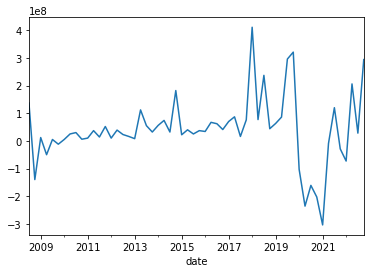

In [54]:
hyatt_data['	NetIncome'].plot()

<AxesSubplot:xlabel='date'>

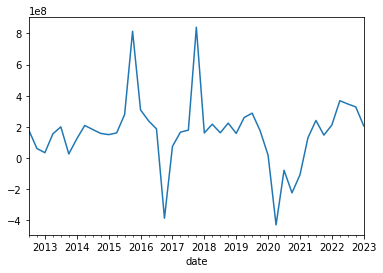

In [55]:
hilton_data['	NetIncome'].plot()

In [56]:
hilton_income = hilton_data['	NetIncome']
hyatt_income = hyatt_data['	NetIncome']

hyatt_data = hyatt_data.astype( 'float')
hyatt_income = hyatt_income.replace(',', '')
hyatt_income = hyatt_income.astype(int)
hyatt_model = ARIMA(hyatt_income, order=(1, 1, 1))
hyatt_fit = hyatt_model.fit()

hilton_data = hilton_data.astype( 'float')
hilton_income = hilton_income.replace(',', '')
hilton_income = hilton_income.astype(int)
hilton_model = ARIMA(hilton_income, order=(1, 1, 1))
hilton_fit = hilton_model.fit()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1Q-DEC will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1Q-DEC will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\ProgramData\Anaconda3

In [57]:
hyatt_forecast = hyatt_fit.forecast(steps=1)
hilton_forecast = hilton_fit.forecast(steps=1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [58]:
hyatt_forecast

58    7.683452e+07
dtype: float64

*Hilton's net income forecast for 2023 is 76834520*

In [59]:
hilton_forecast 

43    1.676822e+08
dtype: float64

*Hilton's net income forecast for 2023 is 167682200*

# Classification

In [82]:
#import data
hotel=pd.read_csv("hotel_satisfaction.csv")
hotel.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [83]:
hotel.columns

Index(['id', 'Gender', 'Age', 'purpose_of_travel', 'Type of Travel',
       'Type Of Booking', 'Hotel wifi service',
       'Departure/Arrival  convenience', 'Ease of Online booking',
       'Hotel location', 'Food and drink', 'Stay comfort',
       'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [84]:
# Data of satisfaction is converted into Binary Data
df_one = pd.get_dummies(hotel["satisfaction"])

# Binary Data is Concatenated into Dataframe
df_two = pd.concat((df_six,df_five,df_four,df_three,df_one, hotel), axis=1)
 
# satisfaction column is dropped
df_two = df_two.drop(["satisfaction","Gender","purpose_of_travel","Type of Travel","Type Of Booking",'aviation'
                     ,'Group Travel','Group bookings','Female'], axis=1)
 
# Rename the Column
df_hotel = df_two.rename(columns={"neutral or dissatisfied": "satisfaction"})
 
df_hotel.head()

,Individual/Couple,Not defined,Personal Travel,academic,business,personal,tourism,Male,satisfaction,satisfied,...,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
0,0,1,1,0,0,0,0,1,1,0,...,3,4,3,1,5,5,5,4,5,5
1,0,0,0,0,0,0,1,1,1,0,...,3,2,3,3,1,1,1,1,4,1
2,0,0,0,0,0,0,1,0,0,1,...,2,2,2,2,5,5,5,4,4,5
3,0,0,0,0,0,0,1,0,1,0,...,2,5,5,5,2,2,2,1,4,2
4,0,0,0,0,0,0,0,1,0,1,...,3,3,3,3,4,5,3,3,3,3


In [85]:
#split dataset in features and target variable
feature_cols = ['Hotel wifi service',
       'Departure/Arrival  convenience', 'Ease of Online booking',
       'Hotel location', 'Food and drink', 'Stay comfort',
       'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness'
           ]
X = df_hotel[feature_cols] # Features
y = df_hotel["satisfaction"] # Target variable

In [86]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [87]:
X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 6


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:               103904
Model:                          Logit   Df Residuals:                   103893
Method:                           MLE   Df Model:                           10
Date:                Sun, 07 May 2023   Pseudo R-squ.:                     inf
Time:                        23:40:55   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              5.2844      0.045    116.650      0.000       5.196       5.373
Hotel wifi service                -0.4901      0.009    -54.184      0.000      -0.508      -0.472
Departure/Arrival  convenience     0.3317      0.006     54.256      0.000       0.320       0.344
Ease of Online booking            -0.1531      0.009    -17.153      0.000      -0.171      -0.136
Hotel location                     0.0813      0.007     11.652      0.000       0.068       0.095
Food and drink                     0.2066      0.008     24.889      0.000       0.190       0.223
Stay comfort                      -0.3894      0.008    -47.021      0.000      -0.406      -0.373
Common Room entertainment         -0.4491      0.010    -44.061      0.000      -0.469      -0.429
Checkin/Checkout service          -0.3560      0.007    -54.719      0.000      -0.369      -0.343
Other service                     -0.2196      0.008    -27.628      0.000      -0.235      -0.204
Cleanliness                       -0.0590      0.009     -6.272      0.000      -0.078      -0.041
==================================================================================================
"""

*Based on the analysis of factors influencing hotel customer satisfaction, it can be concluded that wifi, public entertainment rooms, comfort, and convenient check-in and check-out services have a positive impact on satisfaction. On the other hand, hotel location and cleanliness have little to no impact on customer satisfaction.*

# Statistical Testing

In [194]:
# perform ANOVA test
anova_result = stats.f_oneway(promo_pics[promo_pics['pic_seen'] == 'Sunset']['site_duration'],
                               promo_pics[promo_pics['pic_seen'] == 'Main St']['site_duration'],
                               promo_pics[promo_pics['pic_seen'] == 'Waterslide']['site_duration'])

# print ANOVA results
print('ANOVA Results:')
print('F-statistic:', anova_result.statistic)
print('p-value:', anova_result.pvalue)

# perform pairwise t-tests with Bonferroni correction
t1_result = stats.ttest_ind(promo_pics[promo_pics['pic_seen'] == 'Sunset']['site_duration'],
                            promo_pics[promo_pics['pic_seen'] == 'Main St']['site_duration'])
t2_result = stats.ttest_ind(promo_pics[promo_pics['pic_seen'] == 'Sunset']['site_duration'],
                            promo_pics[promo_pics['pic_seen'] == 'Waterslide']['site_duration'])
t3_result = stats.ttest_ind(promo_pics[promo_pics['pic_seen'] == 'Main St']['site_duration'],
                            promo_pics[promo_pics['pic_seen'] == 'Waterslide']['site_duration'])

# apply Bonferroni correction
alpha = 0.05 / 3

# print pairwise t-test results
print('Pairwise T-Tests with Bonferroni Correction:')
print('Sunset vs. Main St: t-value =', t1_result.statistic, 'p-value =', t1_result.pvalue)
print('Sunset vs. Waterslide: t-value =', t2_result.statistic, 'p-value =', t2_result.pvalue)
print('Main St vs. Waterslide: t-value =', t3_result.statistic, 'p-value =', t3_result.pvalue)

# make recommendation based on results
if (anova_result.pvalue < alpha) and (t1_result.pvalue < alpha) and (t2_result.pvalue < alpha):
    print('Based on the ANOVA and pairwise t-test results, Lobster Land should use the Sunset picture for the next round of invites.')
else:
    print('Based on the ANOVA and pairwise t-test results, Lobster Land should NOT use the Sunset picture for the next round of invites.')


ANOVA Results:
F-statistic: 8766.19113936543
p-value: 0.0
Pairwise T-Tests with Bonferroni Correction:
Sunset vs. Main St: t-value = -9.911415184705456 p-value = 1.0724418388111107e-22
Sunset vs. Waterslide: t-value = 180.71977956194002 p-value = 0.0
Main St vs. Waterslide: t-value = 112.12607762440105 p-value = 0.0
Based on the ANOVA and pairwise t-test results, Lobster Land should use the Sunset picture for the next round of invites.


*The ANOVA test shows that there is a statistically significant difference between the mean values of the three groups (pictures) with a very small p-value (p<0.05). This means that at least one of the pictures is significantly different from the others in terms of their effect on click-through rates.*

*The pairwise t-tests with Bonferroni correction were then conducted to determine which of the three pictures were significantly different from each other. The results show that the Sunset picture was significantly different from the other two pictures, with very small p-values (p<0.05), whereas there was no significant difference between the Main St and Waterslide pictures.*

*Based on these results, we can conclude that the Sunset picture performed significantly better than the other two pictures, and therefore, Lobster Land should use the Sunset picture for the next round of invites.*

# Conclusions

*Through the analysis of the whole project, our team can provide some insights to the Lobster Land* 

*1 In our analysis of the park's accidents, we found that "Collision: patron-controlled vehicles" was the most frequent and serious type of accident, so maybe Lobsterland should avoid letting visitors operate their own vehicles in the future. In addition, accident data from lobster Land shows that children and women are more likely to have accidents, so we can suggest that lobster Land conduct safety demonstrations and first aid training for these groups. Accidents without operational errors can have more serious consequences, so it is recommended that lobster Land thoroughly investigate the causes of these accidents and find ways to prevent similar accidents from occurring in the future. Finally, the Lobster Land should evaluate and improve the safety factor of the "water slide" and "roller coaster", which have the most accidents, and the "roller coaster" and "spinning" equipment, which have the most injuries.*

*2 Through the analysis of the skiing-themed hotels, we came up with some points that Lobsterland can refer to when providing hotel services can be targeted marketing according to customer segmentation, for example, for families with children can provide cartoon theme suites.*

*3 As for the hotel amenities,hotels in Lobster Land need to prioritize the addition of amenities that will significantly improve customer satisfaction within a limited budget.According to the results of the conjoint analysis, the best wifi, full breakfast, luxury gym will have a very positive effect on attracting customers.*

*4 By analyzing the existing customer satisfaction data of Lobsterland we found that: in order to better provide accommodation services for Lobsterland customers, the hotel needs to improve wifi, public entertainment facilities, convenient check-in and check-out and other services*

*5 After analyzing the popularity of the three images, we suggested that Lobster Park use the Sunset image for the invitation email.*